<a href="https://colab.research.google.com/github/islam-mirajul/ICP-Pattern-Recognition/blob/main/ICP_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clustering and Classification of UGV Designs**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tabulate import tabulate
import matplotlib.pyplot as plt

In [2]:
# File path to the dataset
file_path = '/content/drive/MyDrive/Courses/Pattern Recognition/ICP/ICP_Data.csv'

# Load the dataset
data = pd.read_csv(file_path)
print("\nLoaded Dataset:")
print(tabulate(data.head(), headers='keys', tablefmt='psql'))


Loaded Dataset:
+----+-------------+----------------------------+-----------------------+------------------+--------------------------+-----------------------------+-----------------+--------------------+---------------------+-----------------------+--------------------------+-------------------------+---------------------------+-----------------+--------------------+-----------------------+--------------------------+--------------------------------+--------------------------+-------------------------+---------------------+--------------------------+---------------------+-------------------------+---------------------------+
|    |   Design_ID | Chassis_Type               | Wheel_Configuration   |   Footprint_Area |   Volume_to_Weight_Ratio |   Chassis_Weight_Percentage |   Power_Density |   Power_Efficiency |   Energy_Efficiency |   Motor_Power_Density |   Battery_Energy_Density |   Motor_to_Weight_Ratio |   Battery_to_Weight_Ratio |   Agility_Score |   Stability_Factor |   Speed_to_

In [3]:
# Drop unnecessary columns
data = data.drop(columns=['Design_ID', 'Chassis_Type'])

# Features for clustering
features = [
    'Wheel_Configuration', 'Footprint_Area', 'Volume_to_Weight_Ratio',
    'Chassis_Weight_Percentage', 'Power_Density', 'Power_Efficiency',
    'Energy_Efficiency', 'Motor_Power_Density', 'Battery_Energy_Density',
    'Motor_to_Weight_Ratio', 'Battery_to_Weight_Ratio', 'Agility_Score',
    'Stability_Factor', 'Speed_to_Size_Ratio', 'Wheel_to_Chassis_Ratio',
    'Terrain_Adaptability (ratio)', 'Torque_to_Weight_Ratio', 'Operational_Endurance',
    'Operational_Range', 'Control_Responsiveness', 'Control_Precision',
    'Sensor_Coverage_Ratio', 'Sensor_Range_Efficiency'
]

# Clean column names
data.columns = data.columns.str.replace(r'\s*\([^)]*\)', '').str.strip()

# Display first few rows
print(tabulate(data.head(), headers='keys', tablefmt='psql'))

+----+-----------------------+------------------+--------------------------+-----------------------------+-----------------+--------------------+---------------------+-----------------------+--------------------------+-------------------------+---------------------------+-----------------+--------------------+-----------------------+--------------------------+--------------------------------+--------------------------+-------------------------+---------------------+--------------------------+---------------------+-------------------------+---------------------------+
|    | Wheel_Configuration   |   Footprint_Area |   Volume_to_Weight_Ratio |   Chassis_Weight_Percentage |   Power_Density |   Power_Efficiency |   Energy_Efficiency |   Motor_Power_Density |   Battery_Energy_Density |   Motor_to_Weight_Ratio |   Battery_to_Weight_Ratio |   Agility_Score |   Stability_Factor |   Speed_to_Size_Ratio |   Wheel_to_Chassis_Ratio |   Terrain_Adaptability (ratio) |   Torque_to_Weight_Ratio |   O

In [4]:
# Encode the categorical feature
le = LabelEncoder()
data['Wheel_Configuration'] = le.fit_transform(data['Wheel_Configuration'])

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[features])

In [32]:
# Custom K-means implementation
def custom_kmeans(X, n_clusters, max_iters=100, tol=1e-4):
    n_samples, n_features = X.shape
    centroids = X[np.random.choice(n_samples, n_clusters, replace=False)]

    for _ in range(max_iters):
        old_centroids = centroids.copy()

        # Assign points to nearest centroid
        distances = np.sqrt(((X[:, np.newaxis, :] - centroids[np.newaxis, :, :]) ** 2).sum(axis=2))
        labels = np.argmin(distances, axis=1)

        # Update centroids
        for k in range(n_clusters):
            centroids[k] = X[labels == k].mean(axis=0)

        if np.all(np.abs(old_centroids - centroids) < tol):
            break

    return labels, centroids

# Perform custom K-means clustering
n_clusters = 4
labels, centroids = custom_kmeans(X_scaled, n_clusters)

In [33]:
# Function to assign class names based on cluster
def map_cluster_to_class_name(cluster_label):
    class_names = {
        0: 'Low Performance UGV',
        1: 'Moderate Performance UGV',
        2: 'Standard Performance UGV',
        3: 'Advanced Performance UGV'
    }
    return class_names.get(cluster_label, 'Unknown')

# Add cluster and class labels to the dataframe
data['cluster'] = labels
data['design_class'] = data['cluster'].apply(map_cluster_to_class_name)

In [34]:
# Display the first few rows to verify
print("\nFirst few rows after clustering:")
print(data[['cluster', 'design_class']].head(25))


First few rows after clustering:
    cluster              design_class
0         3  Advanced Performance UGV
1         0       Low Performance UGV
2         3  Advanced Performance UGV
3         3  Advanced Performance UGV
4         3  Advanced Performance UGV
5         3  Advanced Performance UGV
6         0       Low Performance UGV
7         1  Moderate Performance UGV
8         0       Low Performance UGV
9         0       Low Performance UGV
10        1  Moderate Performance UGV
11        3  Advanced Performance UGV
12        0       Low Performance UGV
13        0       Low Performance UGV
14        0       Low Performance UGV
15        0       Low Performance UGV
16        3  Advanced Performance UGV
17        2  Standard Performance UGV
18        3  Advanced Performance UGV
19        3  Advanced Performance UGV
20        0       Low Performance UGV
21        0       Low Performance UGV
22        3  Advanced Performance UGV
23        3  Advanced Performance UGV
24        0     

In [35]:
# Summary statistics for each cluster
summary_stats = data.groupby('design_class')[features].mean()  # Use the list `features` directly
print("\nSummary statistics for each cluster:")
print(tabulate(summary_stats, headers='keys', tablefmt='psql'))


Summary statistics for each cluster:
+--------------------------+-----------------------+------------------+--------------------------+-----------------------------+-----------------+--------------------+---------------------+-----------------------+--------------------------+-------------------------+---------------------------+-----------------+--------------------+-----------------------+--------------------------+--------------------------------+--------------------------+-------------------------+---------------------+--------------------------+---------------------+-------------------------+---------------------------+
| design_class             |   Wheel_Configuration |   Footprint_Area |   Volume_to_Weight_Ratio |   Chassis_Weight_Percentage |   Power_Density |   Power_Efficiency |   Energy_Efficiency |   Motor_Power_Density |   Battery_Energy_Density |   Motor_to_Weight_Ratio |   Battery_to_Weight_Ratio |   Agility_Score |   Stability_Factor |   Speed_to_Size_Ratio |   Wheel_

In [36]:
# Display the design folder names with their predicted class
class_mapping_df = data[['cluster', 'design_class']]
print("\nDesign Folder Names with Corresponding Classes:")
print(class_mapping_df)



Design Folder Names with Corresponding Classes:
      cluster              design_class
0           3  Advanced Performance UGV
1           0       Low Performance UGV
2           3  Advanced Performance UGV
3           3  Advanced Performance UGV
4           3  Advanced Performance UGV
...       ...                       ...
4577        0       Low Performance UGV
4578        0       Low Performance UGV
4579        3  Advanced Performance UGV
4580        0       Low Performance UGV
4581        0       Low Performance UGV

[4582 rows x 2 columns]


In [37]:
# Count the number of designs in each class
class_counts = data['design_class'].value_counts()

# Display the counts of each class
print("\nCount of Designs in Each Class:")
print(class_counts)


Count of Designs in Each Class:
design_class
Low Performance UGV         2131
Advanced Performance UGV    1656
Standard Performance UGV     564
Moderate Performance UGV     231
Name: count, dtype: int64


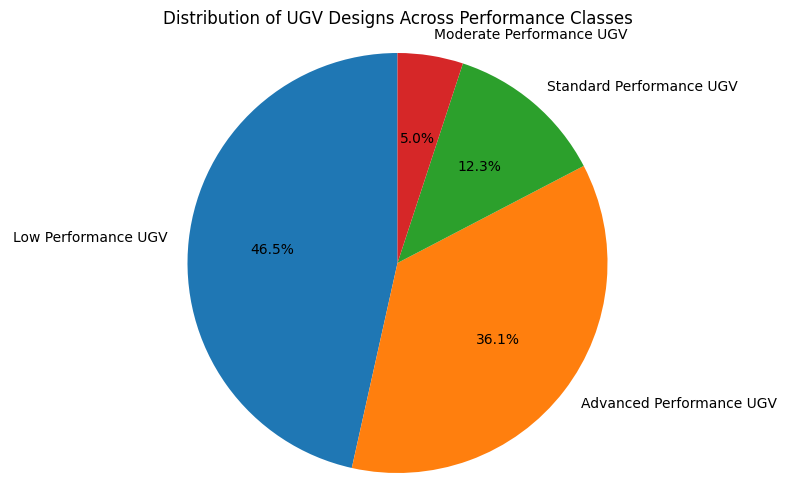

In [38]:
# Pie Chart
plt.figure(figsize=(10, 6))
plt.pie(class_counts.values, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of UGV Designs Across Performance Classes')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

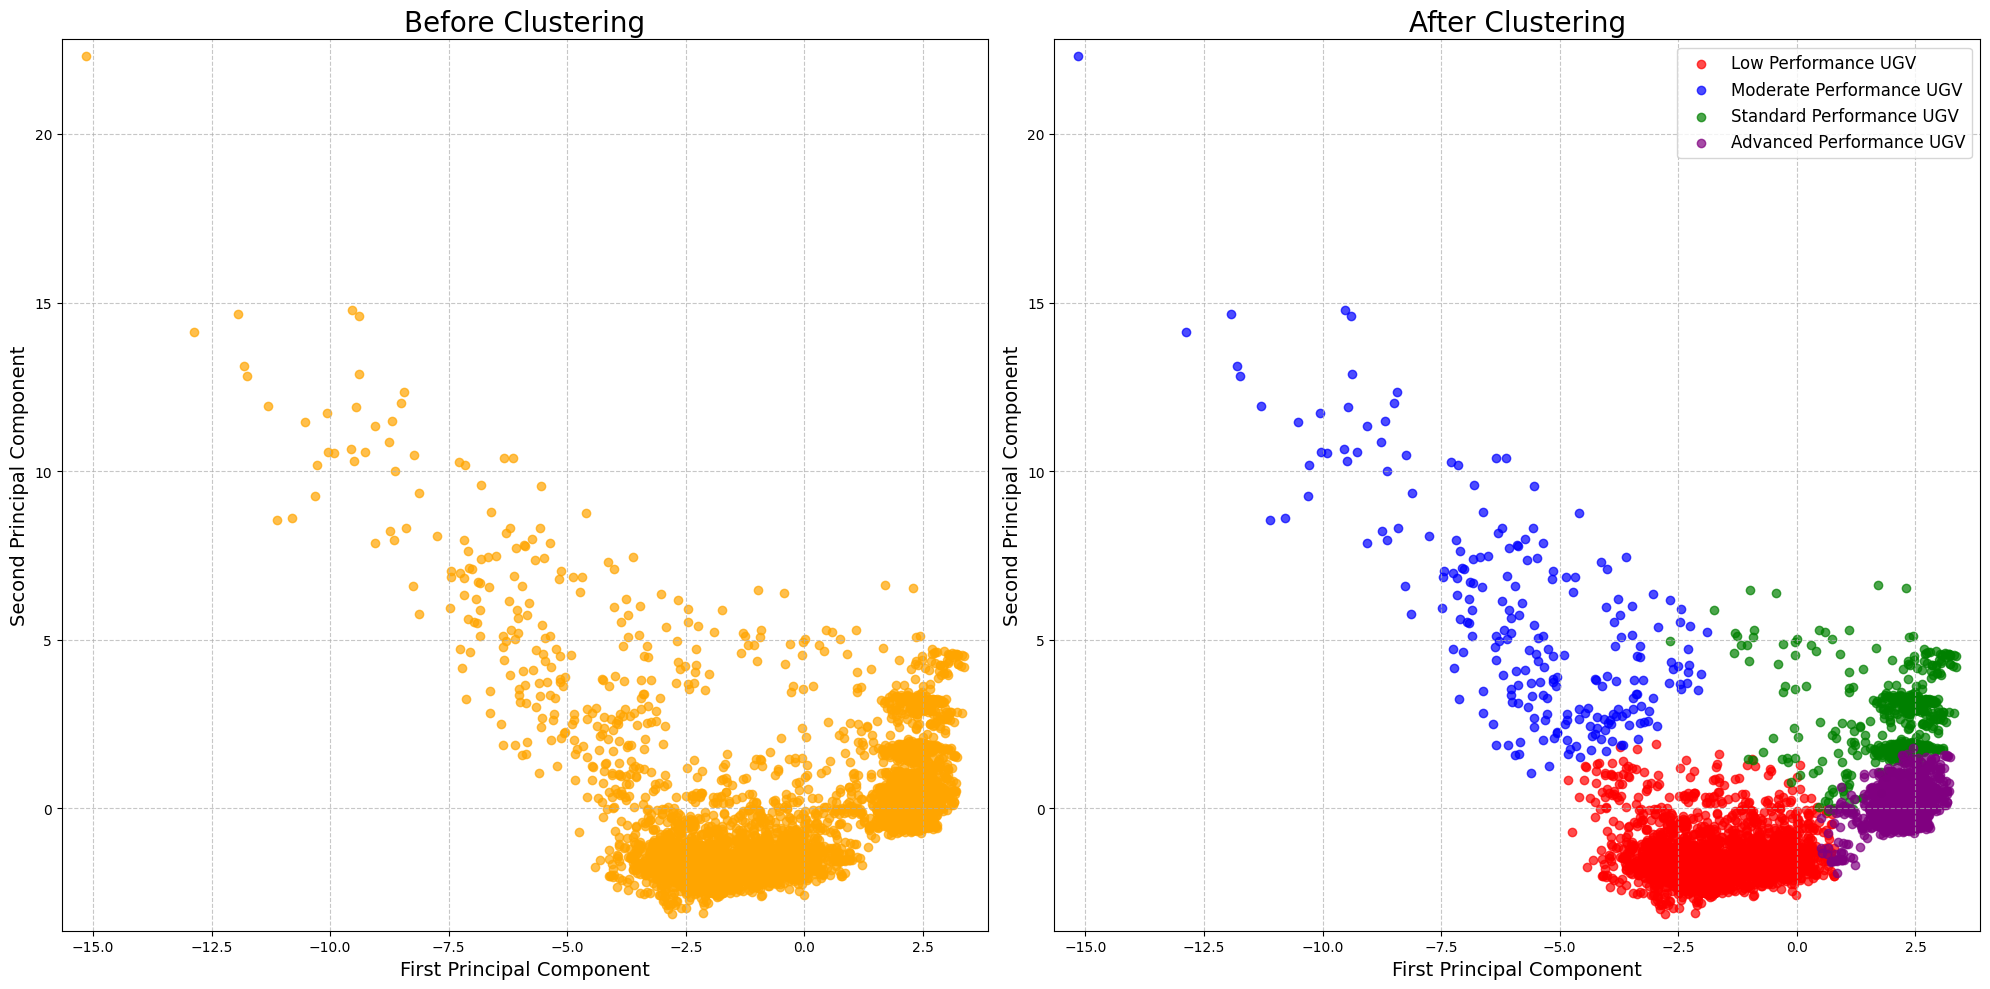

In [39]:
from sklearn.decomposition import PCA

# Perform PCA to reduce the data to 2 dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a color map for the classes
class_colors = {
    'Low Performance UGV': 'red',
    'Moderate Performance UGV': 'blue',
    'Standard Performance UGV': 'green',
    'Advanced Performance UGV': 'purple'
}

# Create the plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Before clustering
ax1.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7, color='orange')
ax1.set_title('Before Clustering', fontsize=20)
ax1.set_xlabel('First Principal Component', fontsize=14)
ax1.set_ylabel('Second Principal Component', fontsize=14)
ax1.grid(True, linestyle='--', alpha=0.7)

# After clustering
for class_name in class_colors:
    mask = data['design_class'] == class_name
    ax2.scatter(X_pca[mask, 0], X_pca[mask, 1],
                c=class_colors[class_name],
                label=class_name,
                alpha=0.7)

ax2.set_title('After Clustering', fontsize=20)
ax2.set_xlabel('First Principal Component', fontsize=14)
ax2.set_ylabel('Second Principal Component', fontsize=14)
ax2.legend(fontsize=12, loc='best')
ax2.grid(True, linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()

# Ensure both plots have the same scale
x_min = X_pca[:, 0].min() - 0.5
x_max = X_pca[:, 0].max() + 0.5
y_min = X_pca[:, 1].min() - 0.5
y_max = X_pca[:, 1].max() + 0.5

ax1.set_xlim(x_min, x_max)
ax1.set_ylim(y_min, y_max)
ax2.set_xlim(x_min, x_max)
ax2.set_ylim(y_min, y_max)

plt.show()

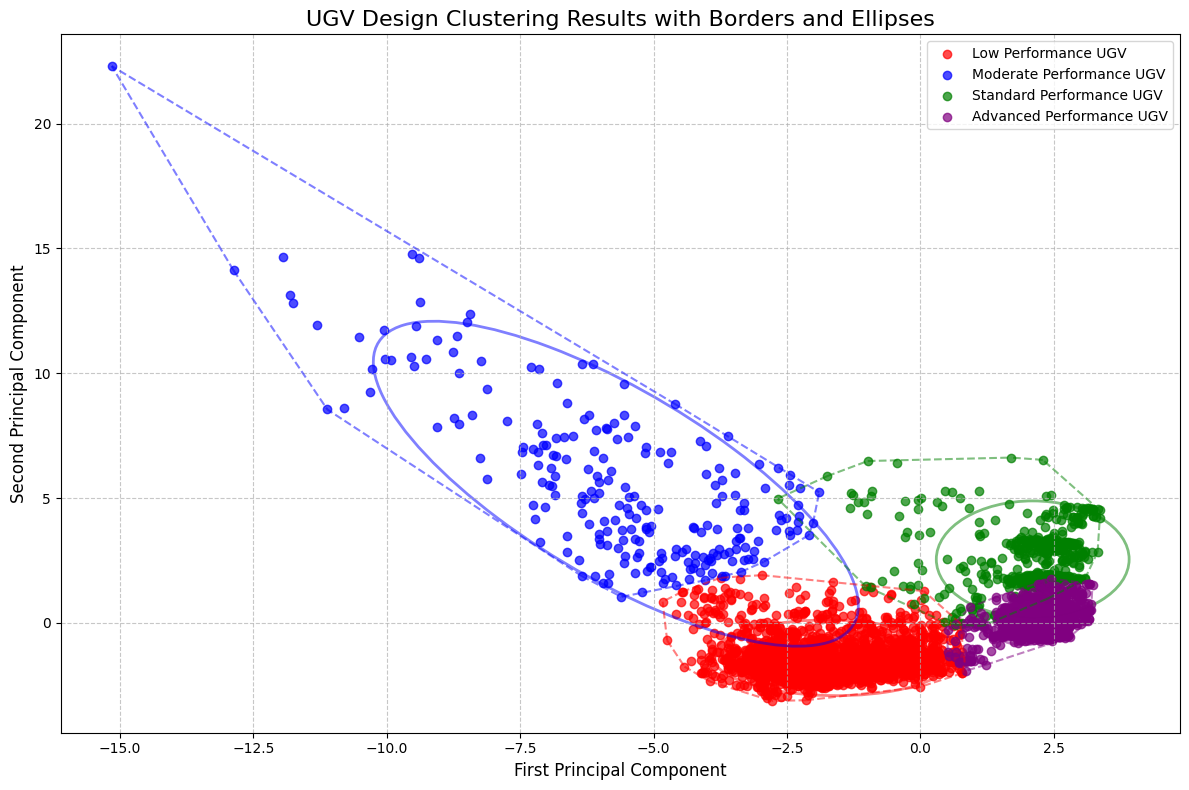

In [40]:
from scipy.spatial import ConvexHull
from matplotlib.patches import Ellipse

# Reduce data to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create color map for classes
class_colors = {
    'Low Performance UGV': 'red',
    'Moderate Performance UGV': 'blue',
    'Standard Performance UGV': 'green',
    'Advanced Performance UGV': 'purple'
}

plt.figure(figsize=(12, 8))

# Plot data points and draw borders
for class_name, color in class_colors.items():
    mask = data['design_class'] == class_name
    points = X_pca[mask]
    plt.scatter(points[:, 0], points[:, 1], c=color, label=class_name, alpha=0.7)

    # Draw border (convex hull)
    hull = ConvexHull(points)
    for simplex in hull.simplices:
        plt.plot(points[simplex, 0], points[simplex, 1], color=color, linestyle='--', alpha=0.5)

    # Draw ellipse
    cov = np.cov(points, rowvar=False)
    eigenvals, eigenvecs = np.linalg.eigh(cov)
    angle = np.degrees(np.arctan2(*eigenvecs[:, 0][::-1]))
    width, height = 4 * np.sqrt(eigenvals)
    ellipse = Ellipse(xy=points.mean(axis=0), width=width, height=height, angle=angle,
                      edgecolor=color, fc='none', lw=2, alpha=0.5)
    plt.gca().add_patch(ellipse)

plt.title('UGV Design Clustering Results with Borders and Ellipses', fontsize=16)
plt.xlabel('First Principal Component', fontsize=12)
plt.ylabel('Second Principal Component', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [41]:
from sklearn.model_selection import StratifiedShuffleSplit

# Create a StratifiedShuffleSplit object
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.4, random_state=42)

# Split the data into train and temp (validation + test combined)
for train_index, temp_index in sss.split(data, data['design_class']):
    train_data = data.iloc[train_index]
    temp_data = data.iloc[temp_index]

# Further split temp data into validation and test
sss_temp = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=42)
for val_index, test_index in sss_temp.split(temp_data, temp_data['design_class']):
    val_data = temp_data.iloc[val_index]
    test_data = temp_data.iloc[test_index]

# Function to print dataset statistics
def print_dataset_stats(dataset, name):
    print(f"\n{name} Set:")
    print(dataset['design_class'].value_counts())
    print(f"Total: {len(dataset)}")

# Print statistics for each set
print_dataset_stats(train_data, "Training")
print_dataset_stats(val_data, "Validation")
print_dataset_stats(test_data, "Testing")

# Print percentages
total = len(data)
print(f"\nPercentages:")
print(f"Training: {len(train_data)/total:.2%}")
print(f"Validation: {len(val_data)/total:.2%}")
print(f"Testing: {len(test_data)/total:.2%}")


Training Set:
design_class
Low Performance UGV         1278
Advanced Performance UGV     994
Standard Performance UGV     338
Moderate Performance UGV     139
Name: count, dtype: int64
Total: 2749

Validation Set:
design_class
Low Performance UGV         426
Advanced Performance UGV    331
Standard Performance UGV    113
Moderate Performance UGV     46
Name: count, dtype: int64
Total: 916

Testing Set:
design_class
Low Performance UGV         427
Advanced Performance UGV    331
Standard Performance UGV    113
Moderate Performance UGV     46
Name: count, dtype: int64
Total: 917

Percentages:
Training: 60.00%
Validation: 19.99%
Testing: 20.01%


In [42]:
from sklearn.model_selection import StratifiedShuffleSplit

# Create a StratifiedShuffleSplit object
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.4, random_state=42)

# Split the data into train and temp (validation + test combined)
for train_index, temp_index in sss.split(data, data['design_class']):
    train_data = data.iloc[train_index]
    temp_data = data.iloc[temp_index]

# Further split temp data into validation and test
sss_temp = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=42)
for val_index, test_index in sss_temp.split(temp_data, temp_data['design_class']):
    val_data = temp_data.iloc[val_index]
    test_data = temp_data.iloc[test_index]

# Function to print dataset statistics
def print_dataset_stats(dataset, name):
    print(f"\n{name} Set:")
    print(dataset['design_class'].value_counts())
    print(f"Total: {len(dataset)}")

# Print statistics for each set
print_dataset_stats(train_data, "Training")
print_dataset_stats(val_data, "Validation")
print_dataset_stats(test_data, "Testing")

# Print percentages
total = len(data)
print(f"\nPercentages:")
print(f"Training: {len(train_data)/total:.2%}")
print(f"Validation: {len(val_data)/total:.2%}")
print(f"Testing: {len(test_data)/total:.2%}")

# Prepare your data
X_train = train_data.drop('design_class', axis=1)
y_train = train_data['design_class']
X_test = test_data.drop('design_class', axis=1)
y_test = test_data['design_class']



Training Set:
design_class
Low Performance UGV         1278
Advanced Performance UGV     994
Standard Performance UGV     338
Moderate Performance UGV     139
Name: count, dtype: int64
Total: 2749

Validation Set:
design_class
Low Performance UGV         426
Advanced Performance UGV    331
Standard Performance UGV    113
Moderate Performance UGV     46
Name: count, dtype: int64
Total: 916

Testing Set:
design_class
Low Performance UGV         427
Advanced Performance UGV    331
Standard Performance UGV    113
Moderate Performance UGV     46
Name: count, dtype: int64
Total: 917

Percentages:
Training: 60.00%
Validation: 19.99%
Testing: 20.01%


In [43]:
# Function to plot confusion matrix with full class names
def plot_confusion_matrix(cm, class_names, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()


Custom LDA and QDA Implementation

Covariance matrix is singular; adding a small value to the diagonal.
Custom Linear Discriminant Analysis (LDA)

Confusion Matrix:


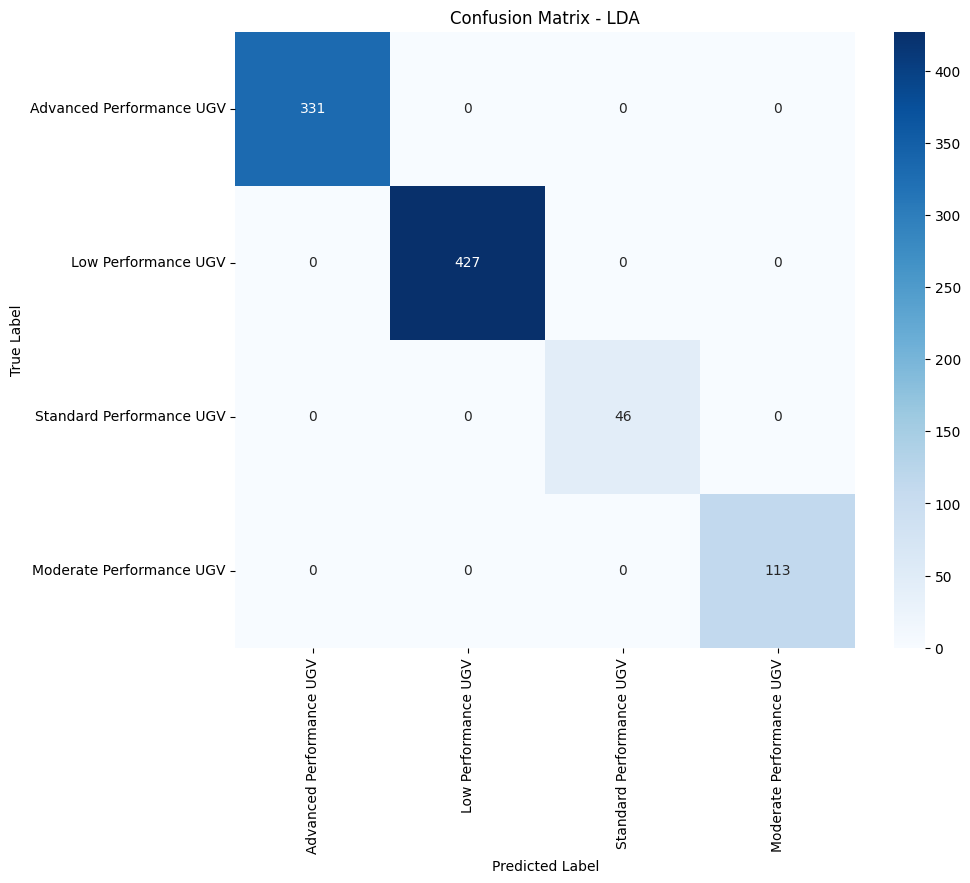


Classification Report:
                          precision    recall  f1-score   support

Advanced Performance UGV       1.00      1.00      1.00       331
     Low Performance UGV       1.00      1.00      1.00       427
Moderate Performance UGV       1.00      1.00      1.00        46
Standard Performance UGV       1.00      1.00      1.00       113

                accuracy                           1.00       917
               macro avg       1.00      1.00      1.00       917
            weighted avg       1.00      1.00      1.00       917


Individual Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Custom Quadratic Discriminant Analysis (QDA)

Confusion Matrix:


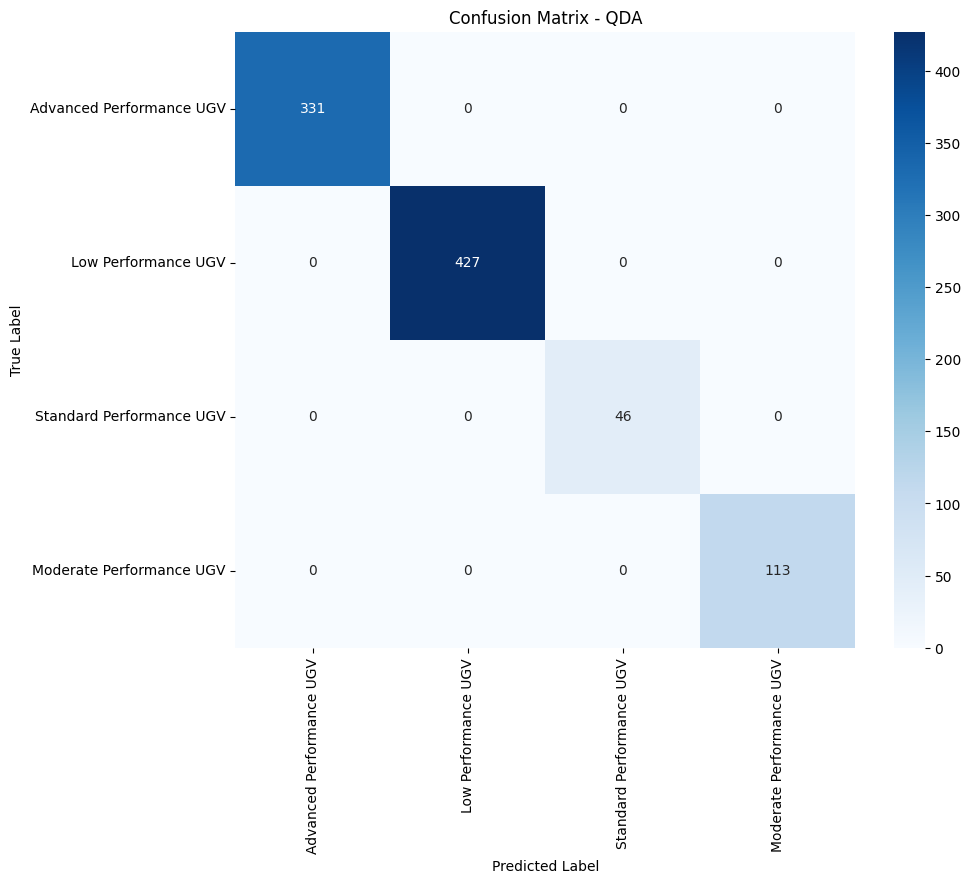


Classification Report:
                          precision    recall  f1-score   support

Advanced Performance UGV       1.00      1.00      1.00       331
     Low Performance UGV       1.00      1.00      1.00       427
Moderate Performance UGV       1.00      1.00      1.00        46
Standard Performance UGV       1.00      1.00      1.00       113

                accuracy                           1.00       917
               macro avg       1.00      1.00      1.00       917
            weighted avg       1.00      1.00      1.00       917


Individual Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import warnings
from sklearn.exceptions import UndefinedMetricWarning

# Suppress warnings for undefined metrics
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

# Assuming train_data and test_data are already defined
X_train = train_data.drop('design_class', axis=1).values  # Convert to NumPy array
y_train = train_data['design_class'].values  # Convert to NumPy array
X_test = test_data.drop('design_class', axis=1).values  # Convert to NumPy array
y_test = test_data['design_class'].values  # Convert to NumPy array

# Function to check for constant features and remove them
def remove_constant_features(X):
    return X[:, np.var(X, axis=0) > 0]

# Remove constant features from training and test sets
X_train = remove_constant_features(X_train)
X_test = remove_constant_features(X_test)

# Function to plot confusion matrix with full class names
def plot_confusion_matrix(cm, class_names, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Custom LDA Implementation
class CustomLDA:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.means = {}
        self.priors = {}
        self.covariance = np.zeros((X.shape[1], X.shape[1]))

        # Calculate means and priors for each class
        for cls in self.classes:
            X_cls = X[y == cls]
            self.means[cls] = np.mean(X_cls, axis=0)
            self.priors[cls] = X_cls.shape[0] / X.shape[0]
            centered_X = X_cls - self.means[cls]
            self.covariance += np.dot(centered_X.T, centered_X)

        # Regularization step to avoid singular matrix issues
        if np.linalg.det(self.covariance) == 0:
            print("Covariance matrix is singular; adding a small value to the diagonal.")
            self.covariance += np.eye(self.covariance.shape[0]) * 1e-5

    def predict(self, X):
        n_samples = X.shape[0]
        likelihoods = np.zeros((n_samples, len(self.classes)))

        for idx, cls in enumerate(self.classes):
            mean = self.means[cls]
            prior = self.priors[cls]
            cov_inv = np.linalg.inv(self.covariance)
            diff = X - mean
            likelihoods[:, idx] = (-0.5 * np.sum(np.dot(diff, cov_inv) * diff, axis=1)
                                   - 0.5 * len(mean) * np.log(2 * np.pi)
                                   - 0.5 * np.log(np.linalg.det(self.covariance)) + np.log(prior))

        return self.classes[np.argmax(likelihoods, axis=1)]

# Custom QDA Implementation
class CustomQDA:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.means = {}
        self.priors = {}
        self.covariances = {}

        # Calculate means and priors for each class
        for cls in self.classes:
            X_cls = X[y == cls]
            self.means[cls] = np.mean(X_cls, axis=0)
            self.priors[cls] = X_cls.shape[0] / X.shape[0]
            centered_X = X_cls - self.means[cls]
            self.covariances[cls] = np.dot(centered_X.T, centered_X) / (X_cls.shape[0] - 1)

    def predict(self, X):
        n_samples = X.shape[0]
        likelihoods = np.zeros((n_samples, len(self.classes)))

        for idx, cls in enumerate(self.classes):
            mean = self.means[cls]
            prior = self.priors[cls]

            # Regularization step for QDA covariance matrix
            cov_inv = np.linalg.inv(self.covariances[cls] + np.eye(self.covariances[cls].shape[0]) * 1e-5)
            diff = X - mean

            likelihoods[:, idx] = (-0.5 * np.sum(np.dot(diff, cov_inv) * diff, axis=1)
                                   - 0.5 * len(mean) * np.log(2 * np.pi)
                                   - 0.5 * np.log(np.linalg.det(self.covariances[cls] + np.eye(self.covariances[cls].shape[0]) * 1e-5)) + np.log(prior))

        return self.classes[np.argmax(likelihoods, axis=1)]

# Fit Custom LDA Model
lda_model = CustomLDA()
lda_model.fit(X_train.astype(float), y_train)

# Make predictions with LDA
lda_predictions = lda_model.predict(X_test.astype(float))

print("Custom Linear Discriminant Analysis (LDA)")
print("\nConfusion Matrix:")
lda_cm = confusion_matrix(y_test, lda_predictions)
plot_confusion_matrix(lda_cm, pd.unique(y_train), "Confusion Matrix - LDA")

print("\nClassification Report:")
print(classification_report(y_test, lda_predictions))

print("\nIndividual Metrics:")
print(f"Accuracy: {accuracy_score(y_test, lda_predictions):.4f}")
print(f"Precision: {precision_score(y_test, lda_predictions, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, lda_predictions, average='weighted'):.4f}")
print(f"F1 Score: {f1_score(y_test, lda_predictions, average='weighted'):.4f}")

# Fit Custom QDA Model
qda_model = CustomQDA()
qda_model.fit(X_train.astype(float), y_train)

# Make predictions with QDA
qda_predictions = qda_model.predict(X_test.astype(float))

print("Custom Quadratic Discriminant Analysis (QDA)")
print("\nConfusion Matrix:")
qda_cm = confusion_matrix(y_test, qda_predictions)
plot_confusion_matrix(qda_cm, pd.unique(y_train), "Confusion Matrix - QDA")

print("\nClassification Report:")
print(classification_report(y_test, qda_predictions))

print("\nIndividual Metrics:")
print(f"Accuracy: {accuracy_score(y_test, qda_predictions):.4f}")
print(f"Precision: {precision_score(y_test, qda_predictions, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, qda_predictions, average='weighted'):.4f}")
print(f"F1 Score: {f1_score(y_test, qda_predictions, average='weighted'):.4f}")

Baseline Model (Most Frequent Class)

Baseline Model (Most Frequent Class)

Confusion Matrix:


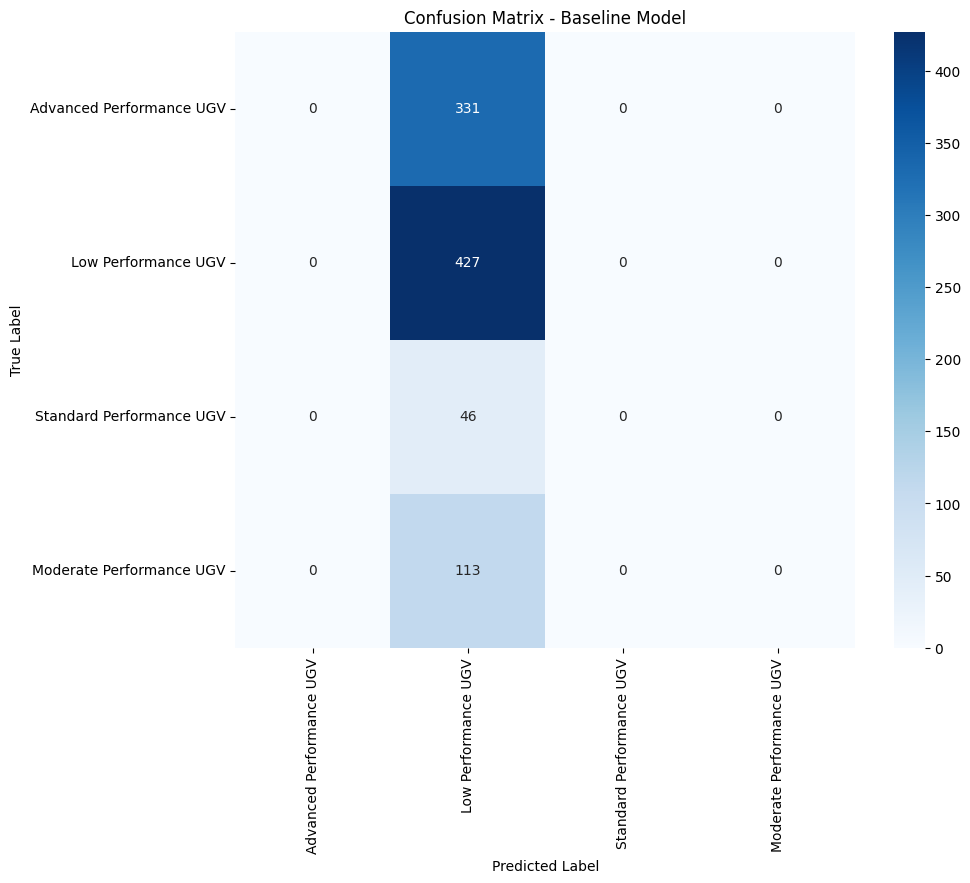


Classification Report:
                          precision    recall  f1-score   support

Advanced Performance UGV       0.00      0.00      0.00       331
     Low Performance UGV       0.47      1.00      0.64       427
Standard Performance UGV       0.00      0.00      0.00        46
Moderate Performance UGV       0.00      0.00      0.00       113

                accuracy                           0.47       917
               macro avg       0.12      0.25      0.16       917
            weighted avg       0.22      0.47      0.30       917


Individual Metrics:
Accuracy: 0.4656
Precision: 0.2168
Recall: 0.4656
F1 Score: 0.2959


In [46]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import warnings
from sklearn.exceptions import UndefinedMetricWarning

warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

X_train = train_data.drop('design_class', axis=1)
y_train = train_data['design_class']
X_test = test_data.drop('design_class', axis=1)
y_test = test_data['design_class']

# Baseline Model (Most Frequent)
baseline_model = DummyClassifier(strategy='most_frequent')
baseline_model.fit(X_train, y_train)
baseline_predictions = baseline_model.predict(X_test)

print("Baseline Model (Most Frequent Class)")
print("\nConfusion Matrix:")
baseline_cm = confusion_matrix(y_test, baseline_predictions)
plot_confusion_matrix(baseline_cm, y_train.unique(), "Confusion Matrix - Baseline Model")

print("\nClassification Report:")
print(classification_report(y_test, baseline_predictions, target_names=y_train.unique()))

print("\nIndividual Metrics:")
print(f"Accuracy: {accuracy_score(y_test, baseline_predictions):.4f}")
print(f"Precision: {precision_score(y_test, baseline_predictions, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, baseline_predictions, average='weighted'):.4f}")
print(f"F1 Score: {f1_score(y_test, baseline_predictions, average='weighted'):.4f}")


Random Classifier

Random Classifier

Confusion Matrix:


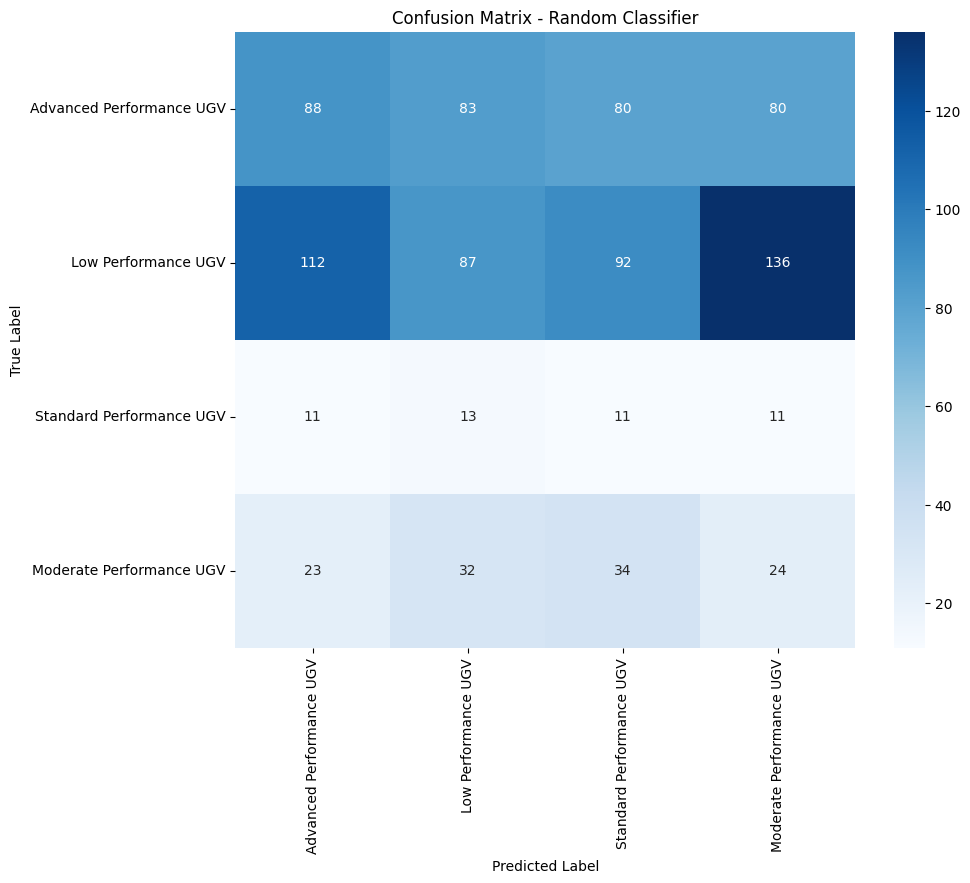


Classification Report:
                          precision    recall  f1-score   support

Advanced Performance UGV       0.38      0.27      0.31       331
     Low Performance UGV       0.40      0.20      0.27       427
Standard Performance UGV       0.05      0.24      0.08        46
Moderate Performance UGV       0.10      0.21      0.13       113

                accuracy                           0.23       917
               macro avg       0.23      0.23      0.20       917
            weighted avg       0.34      0.23      0.26       917


Individual Metrics:
Accuracy: 0.2290
Precision: 0.3385
Recall: 0.2290
F1 Score: 0.2591


In [47]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

# Random Classifier
random_classifier = DummyClassifier(strategy='uniform', random_state=42)
random_classifier.fit(X_train, y_train)
random_predictions = random_classifier.predict(X_test)

print("Random Classifier")
print("\nConfusion Matrix:")
random_cm = confusion_matrix(y_test, random_predictions)
plot_confusion_matrix(random_cm, y_train.unique(), "Confusion Matrix - Random Classifier")

print("\nClassification Report:")
print(classification_report(y_test, random_predictions, target_names=y_train.unique()))

print("\nIndividual Metrics:")
print(f"Accuracy: {accuracy_score(y_test, random_predictions):.4f}")
print(f"Precision: {precision_score(y_test, random_predictions, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, random_predictions, average='weighted'):.4f}")
print(f"F1 Score: {f1_score(y_test, random_predictions, average='weighted'):.4f}")

Stratified Classifier

Stratified Classifier

Confusion Matrix:


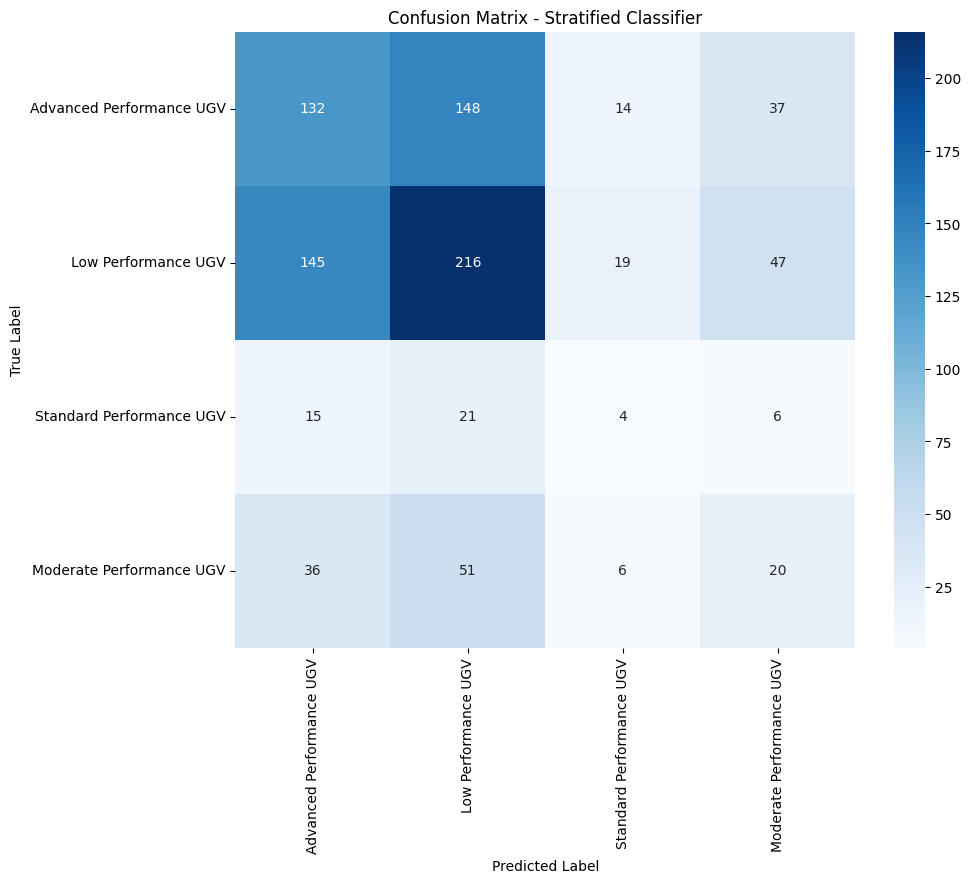


Classification Report:
                          precision    recall  f1-score   support

Advanced Performance UGV       0.40      0.40      0.40       331
     Low Performance UGV       0.50      0.51      0.50       427
Standard Performance UGV       0.09      0.09      0.09        46
Moderate Performance UGV       0.18      0.18      0.18       113

                accuracy                           0.41       917
               macro avg       0.29      0.29      0.29       917
            weighted avg       0.40      0.41      0.40       917


Individual Metrics:
Accuracy: 0.4057
Precision: 0.4030
Recall: 0.4057
F1 Score: 0.4043


In [48]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

# Stratified Classifier
stratified_classifier = DummyClassifier(strategy='stratified', random_state=42)
stratified_classifier.fit(X_train, y_train)
stratified_predictions = stratified_classifier.predict(X_test)

print("Stratified Classifier")
print("\nConfusion Matrix:")
stratified_cm = confusion_matrix(y_test, stratified_predictions)
plot_confusion_matrix(stratified_cm, y_train.unique(), "Confusion Matrix - Stratified Classifier")

print("\nClassification Report:")
print(classification_report(y_test, stratified_predictions, target_names=y_train.unique()))

print("\nIndividual Metrics:")
print(f"Accuracy: {accuracy_score(y_test, stratified_predictions):.4f}")
print(f"Precision: {precision_score(y_test, stratified_predictions, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, stratified_predictions, average='weighted'):.4f}")
print(f"F1 Score: {f1_score(y_test, stratified_predictions, average='weighted'):.4f}")

Support Vector Machine (SVM)

Support Vector Machine (SVM) Classifier

Confusion Matrix:


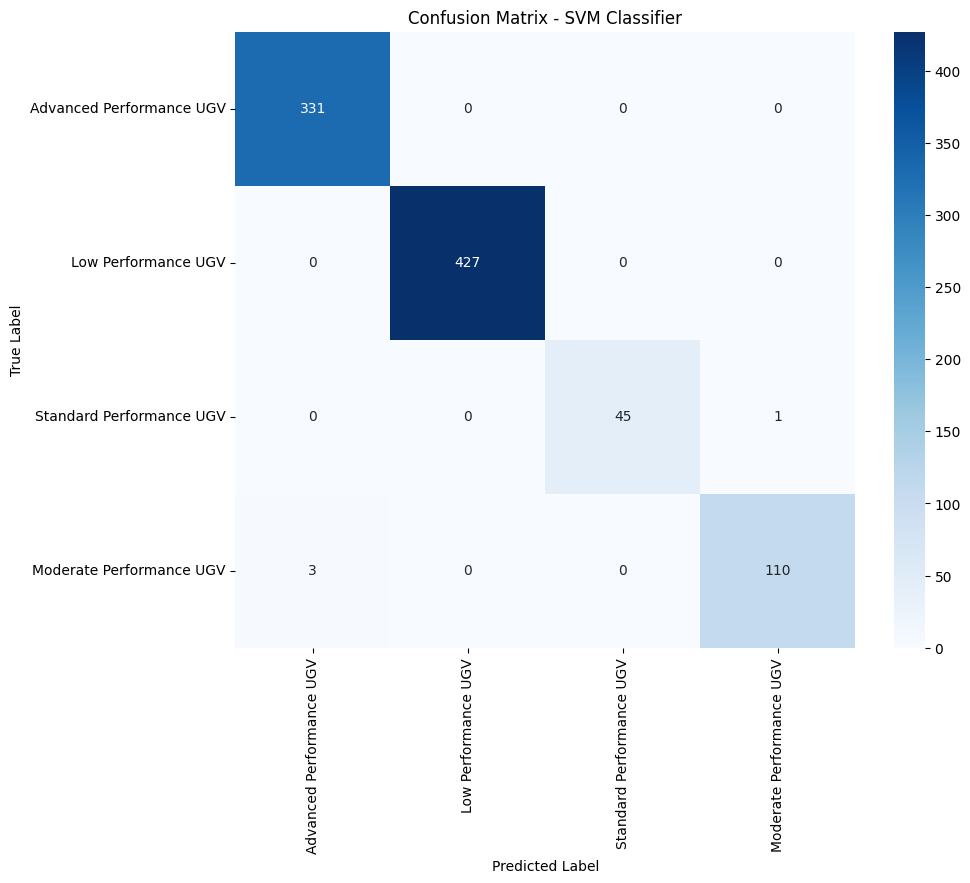


Classification Report:
                          precision    recall  f1-score   support

Advanced Performance UGV       0.99      1.00      1.00       331
     Low Performance UGV       1.00      1.00      1.00       427
Standard Performance UGV       1.00      0.98      0.99        46
Moderate Performance UGV       0.99      0.97      0.98       113

                accuracy                           1.00       917
               macro avg       1.00      0.99      0.99       917
            weighted avg       1.00      1.00      1.00       917


Individual Metrics:
Accuracy: 0.9956
Precision: 0.9956
Recall: 0.9956
F1 Score: 0.9956


In [49]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

# SVM Classifier
svm_classifier = make_pipeline(StandardScaler(), SVC(kernel='rbf', C=1.0, gamma='scale'))
svm_classifier.fit(X_train, y_train)
svm_predictions = svm_classifier.predict(X_test)

print("Support Vector Machine (SVM) Classifier")
print("\nConfusion Matrix:")
svm_cm = confusion_matrix(y_test, svm_predictions)
plot_confusion_matrix(svm_cm, y_train.unique(), "Confusion Matrix - SVM Classifier")

print("\nClassification Report:")
print(classification_report(y_test, svm_predictions, target_names=y_train.unique()))

print("\nIndividual Metrics:")
print(f"Accuracy: {accuracy_score(y_test, svm_predictions):.4f}")
print(f"Precision: {precision_score(y_test, svm_predictions, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, svm_predictions, average='weighted'):.4f}")
print(f"F1 Score: {f1_score(y_test, svm_predictions, average='weighted'):.4f}")

Gaussian Process Classifier

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


Gaussian Process Classifier

Confusion Matrix:


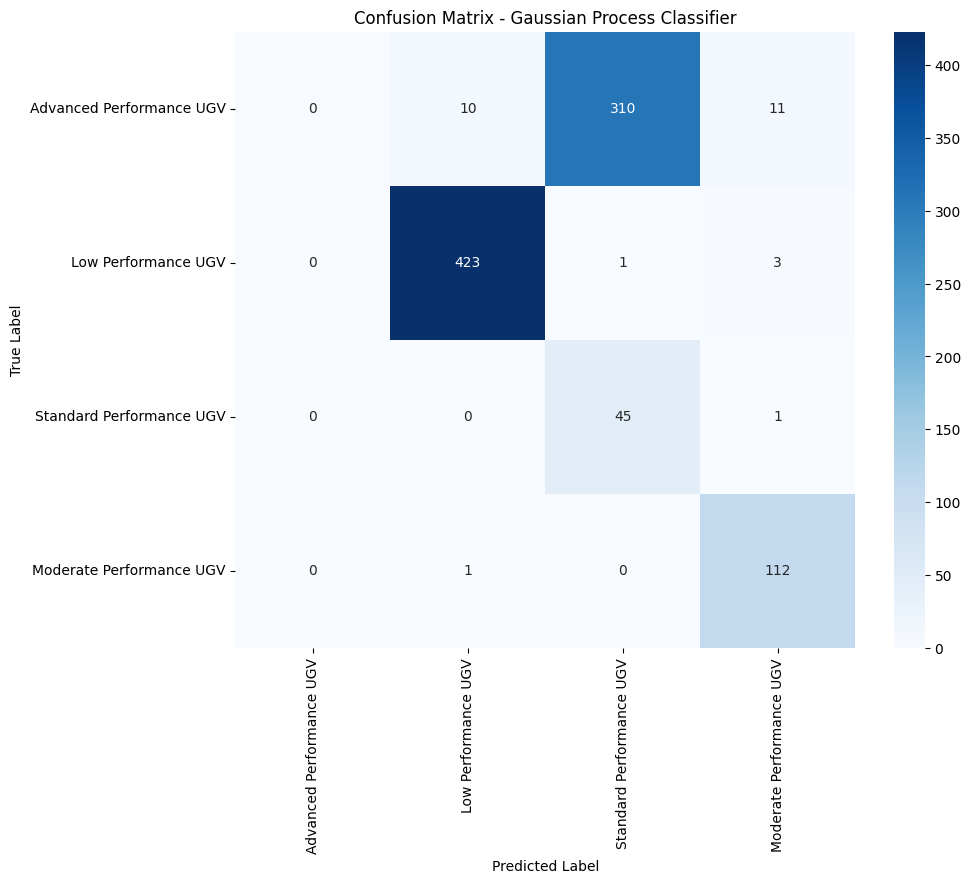


Classification Report:
                          precision    recall  f1-score   support

Advanced Performance UGV       0.00      0.00      0.00       331
     Low Performance UGV       0.97      0.99      0.98       427
Standard Performance UGV       0.13      0.98      0.22        46
Moderate Performance UGV       0.88      0.99      0.93       113

                accuracy                           0.63       917
               macro avg       0.50      0.74      0.53       917
            weighted avg       0.57      0.63      0.58       917


Individual Metrics:
Accuracy: 0.6325
Precision: 0.5689
Recall: 0.6325
F1 Score: 0.5838


In [58]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

# Gaussian Process Classifier
gp_classifier = GaussianProcessClassifier(kernel=1.0 * RBF(length_scale=1.0))
gp_classifier.fit(X_train, y_train)
gp_predictions = gp_classifier.predict(X_test)

print("Gaussian Process Classifier")
print("\nConfusion Matrix:")
gp_cm = confusion_matrix(y_test, gp_predictions)
plot_confusion_matrix(gp_cm, y_train.unique(), "Confusion Matrix - Gaussian Process Classifier")

print("\nClassification Report:")
print(classification_report(y_test, gp_predictions, target_names=y_train.unique()))

print("\nIndividual Metrics:")
print(f"Accuracy: {accuracy_score(y_test, gp_predictions):.4f}")
print(f"Precision: {precision_score(y_test, gp_predictions, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, gp_predictions, average='weighted'):.4f}")
print(f"F1 Score: {f1_score(y_test, gp_predictions, average='weighted'):.4f}")

Random Forest Classifier

Random Forest Classifier

Confusion Matrix:


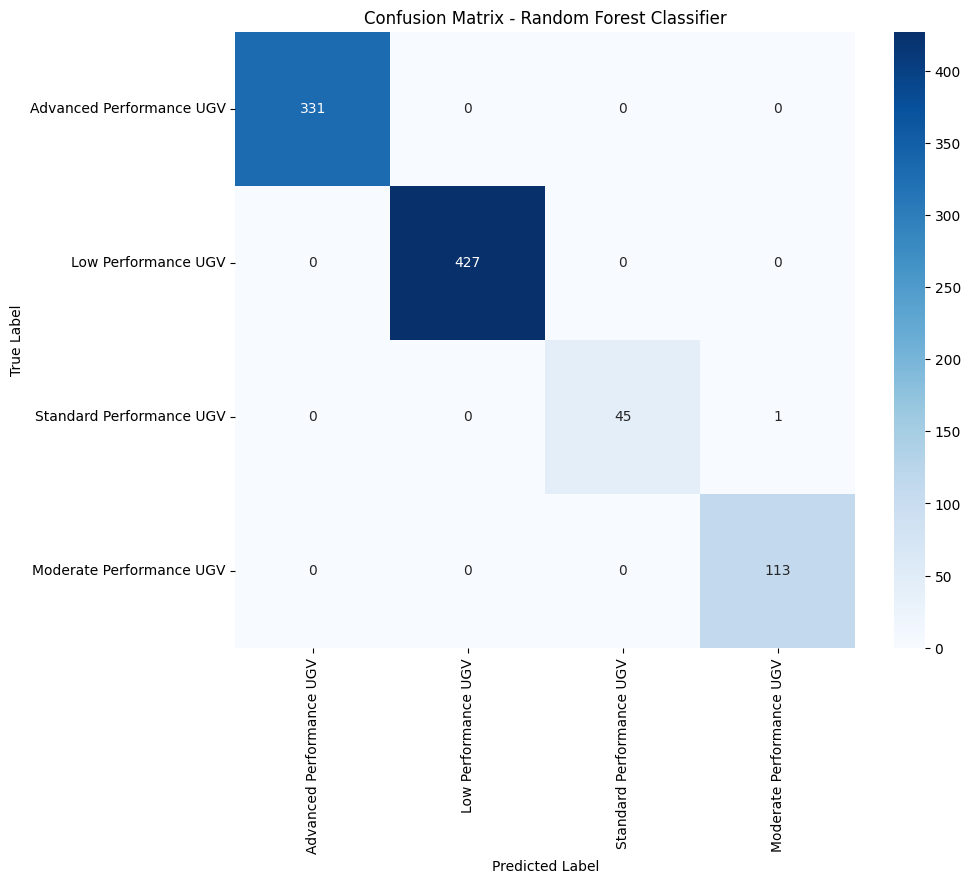


Classification Report:
                          precision    recall  f1-score   support

Advanced Performance UGV       1.00      1.00      1.00       331
     Low Performance UGV       1.00      1.00      1.00       427
Standard Performance UGV       1.00      0.98      0.99        46
Moderate Performance UGV       0.99      1.00      1.00       113

                accuracy                           1.00       917
               macro avg       1.00      0.99      1.00       917
            weighted avg       1.00      1.00      1.00       917


Individual Metrics:
Accuracy: 0.9989
Precision: 0.9989
Recall: 0.9989
F1 Score: 0.9989


In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)

print("Random Forest Classifier")
print("\nConfusion Matrix:")
rf_cm = confusion_matrix(y_test, rf_predictions)
plot_confusion_matrix(rf_cm, y_train.unique(), "Confusion Matrix - Random Forest Classifier")

print("\nClassification Report:")
print(classification_report(y_test, rf_predictions, target_names=y_train.unique()))

print("\nIndividual Metrics:")
print(f"Accuracy: {accuracy_score(y_test, rf_predictions):.4f}")
print(f"Precision: {precision_score(y_test, rf_predictions, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, rf_predictions, average='weighted'):.4f}")
print(f"F1 Score: {f1_score(y_test, rf_predictions, average='weighted'):.4f}")

Gradient Boosting Classifier

Gradient Boosting Classifier

Confusion Matrix:


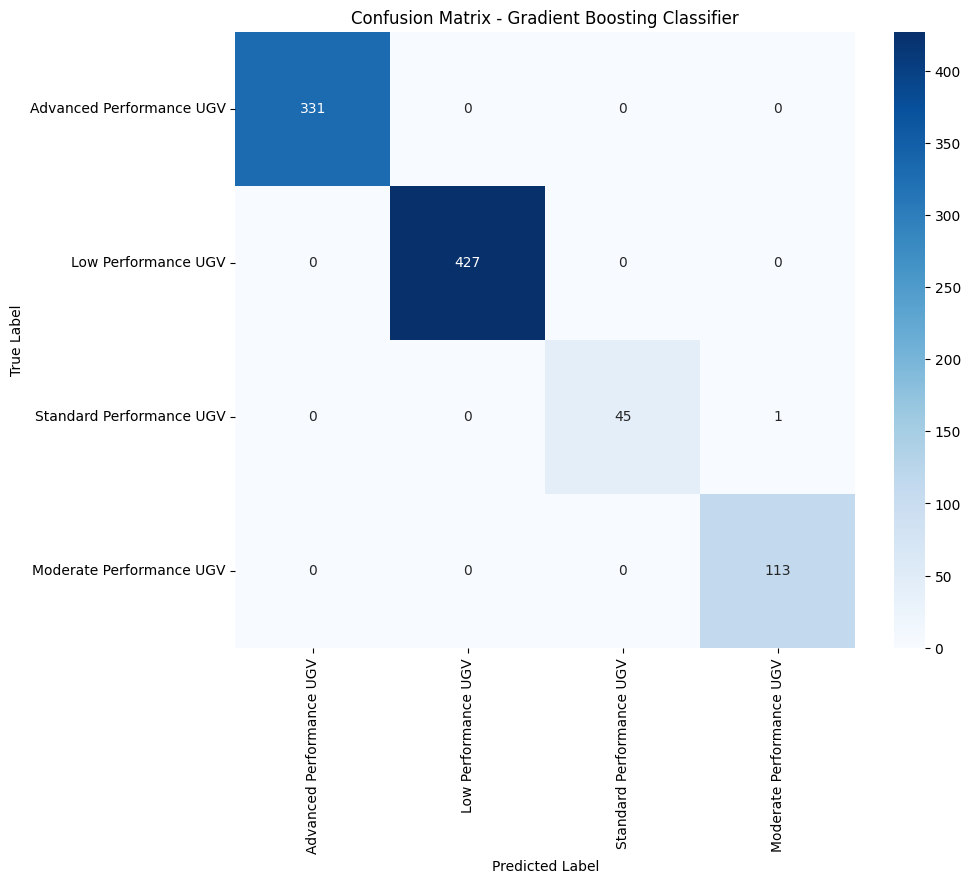


Classification Report:
                          precision    recall  f1-score   support

Advanced Performance UGV       1.00      1.00      1.00       331
     Low Performance UGV       1.00      1.00      1.00       427
Standard Performance UGV       1.00      0.98      0.99        46
Moderate Performance UGV       0.99      1.00      1.00       113

                accuracy                           1.00       917
               macro avg       1.00      0.99      1.00       917
            weighted avg       1.00      1.00      1.00       917


Individual Metrics:
Accuracy: 0.9989
Precision: 0.9989
Recall: 0.9989
F1 Score: 0.9989


In [51]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

# Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_classifier.fit(X_train, y_train)
gb_predictions = gb_classifier.predict(X_test)

print("Gradient Boosting Classifier")
print("\nConfusion Matrix:")
gb_cm = confusion_matrix(y_test, gb_predictions)
plot_confusion_matrix(gb_cm, y_train.unique(), "Confusion Matrix - Gradient Boosting Classifier")

print("\nClassification Report:")
print(classification_report(y_test, gb_predictions, target_names=y_train.unique()))

print("\nIndividual Metrics:")
print(f"Accuracy: {accuracy_score(y_test, gb_predictions):.4f}")
print(f"Precision: {precision_score(y_test, gb_predictions, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, gb_predictions, average='weighted'):.4f}")
print(f"F1 Score: {f1_score(y_test, gb_predictions, average='weighted'):.4f}")

Fisher's Linear Discriminant


Fisher's Linear Discriminant

Confusion Matrix:


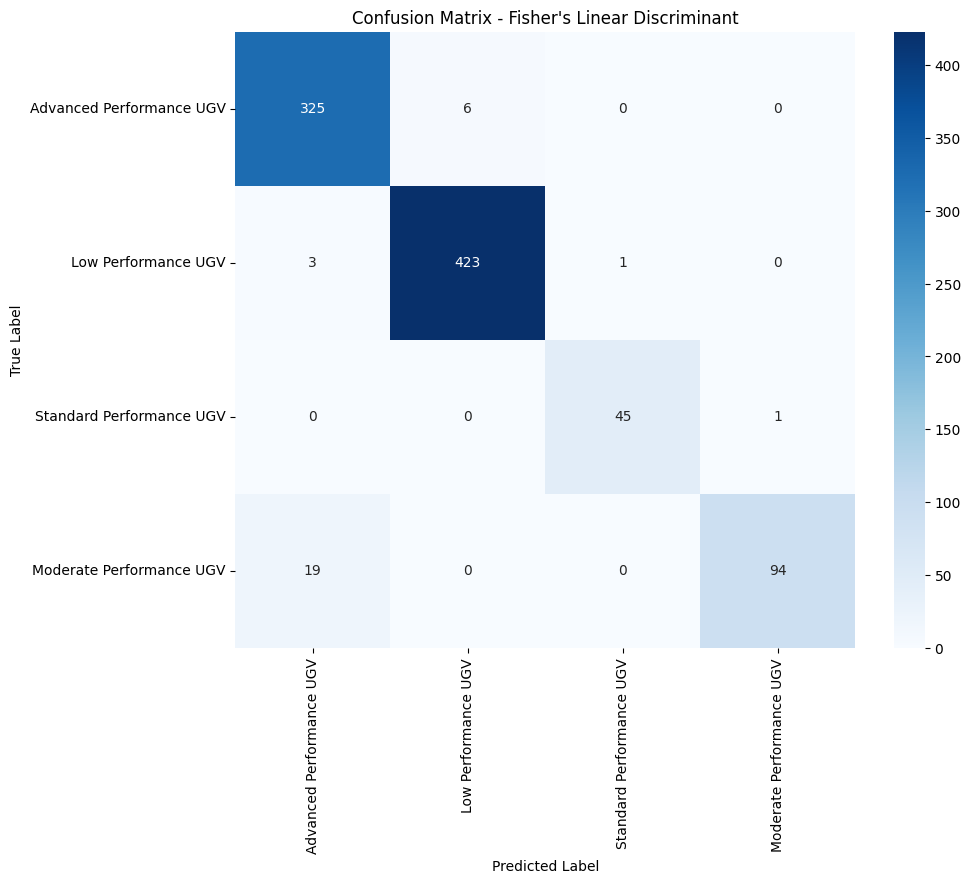


Classification Report:
                          precision    recall  f1-score   support

Advanced Performance UGV       0.94      0.98      0.96       331
     Low Performance UGV       0.99      0.99      0.99       427
Standard Performance UGV       0.98      0.98      0.98        46
Moderate Performance UGV       0.99      0.83      0.90       113

                accuracy                           0.97       917
               macro avg       0.97      0.95      0.96       917
            weighted avg       0.97      0.97      0.97       917


Individual Metrics:
Accuracy: 0.9673
Precision: 0.9682
Recall: 0.9673
F1 Score: 0.9667


In [52]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

# Fisher's Linear Discriminant
lda_classifier = LinearDiscriminantAnalysis()
lda_classifier.fit(X_train, y_train)
lda_predictions = lda_classifier.predict(X_test)

print("Fisher's Linear Discriminant")
print("\nConfusion Matrix:")
lda_cm = confusion_matrix(y_test, lda_predictions)
plot_confusion_matrix(lda_cm, y_train.unique(), "Confusion Matrix - Fisher's Linear Discriminant")

print("\nClassification Report:")
print(classification_report(y_test, lda_predictions, target_names=y_train.unique()))

print("\nIndividual Metrics:")
print(f"Accuracy: {accuracy_score(y_test, lda_predictions):.4f}")
print(f"Precision: {precision_score(y_test, lda_predictions, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, lda_predictions, average='weighted'):.4f}")
print(f"F1 Score: {f1_score(y_test, lda_predictions, average='weighted'):.4f}")

Logistic Regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression

Confusion Matrix:


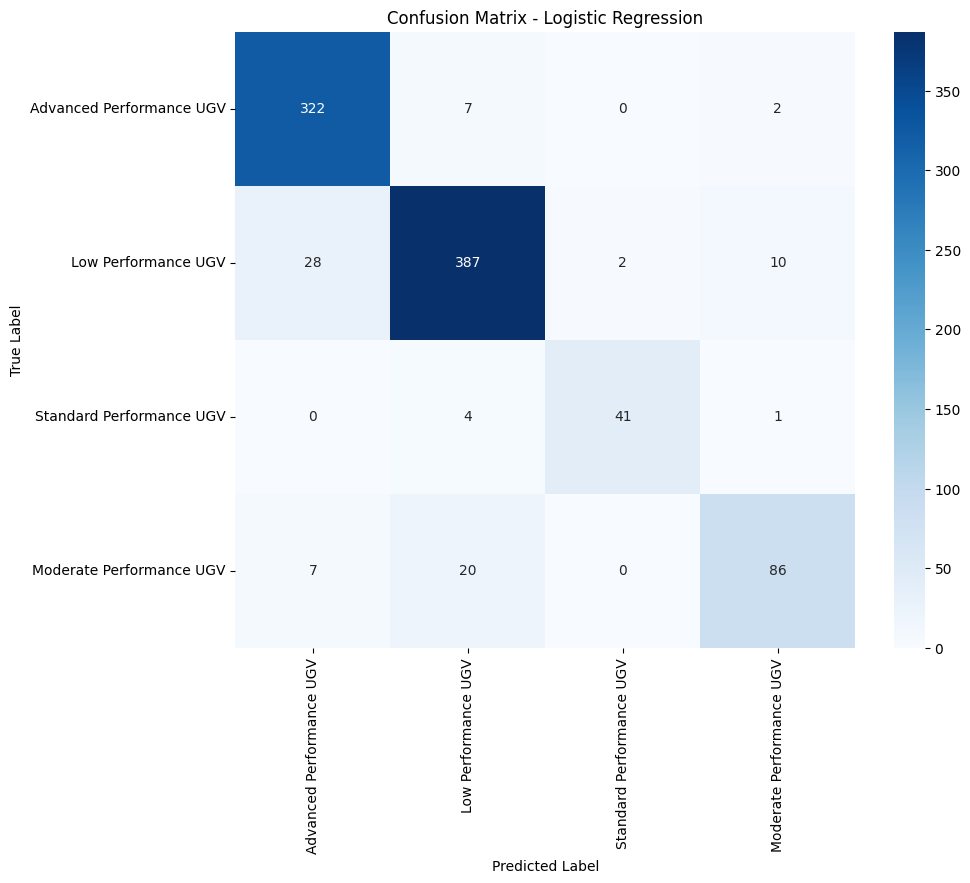


Classification Report:
                          precision    recall  f1-score   support

Advanced Performance UGV       0.90      0.97      0.94       331
     Low Performance UGV       0.93      0.91      0.92       427
Standard Performance UGV       0.95      0.89      0.92        46
Moderate Performance UGV       0.87      0.76      0.81       113

                accuracy                           0.91       917
               macro avg       0.91      0.88      0.90       917
            weighted avg       0.91      0.91      0.91       917


Individual Metrics:
Accuracy: 0.9117
Precision: 0.9116
Recall: 0.9117
F1 Score: 0.9106


In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

# Logistic Regression
logistic_classifier = LogisticRegression(random_state=42)
logistic_classifier.fit(X_train, y_train)
logistic_predictions = logistic_classifier.predict(X_test)

print("Logistic Regression")
print("\nConfusion Matrix:")
logistic_cm = confusion_matrix(y_test, logistic_predictions)
plot_confusion_matrix(logistic_cm, y_train.unique(), "Confusion Matrix - Logistic Regression")

print("\nClassification Report:")
print(classification_report(y_test, logistic_predictions, target_names=y_train.unique()))

print("\nIndividual Metrics:")
print(f"Accuracy: {accuracy_score(y_test, logistic_predictions):.4f}")
print(f"Precision: {precision_score(y_test, logistic_predictions, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, logistic_predictions, average='weighted'):.4f}")
print(f"F1 Score: {f1_score(y_test, logistic_predictions, average='weighted'):.4f}")

Perceptron

Perceptron

Confusion Matrix:


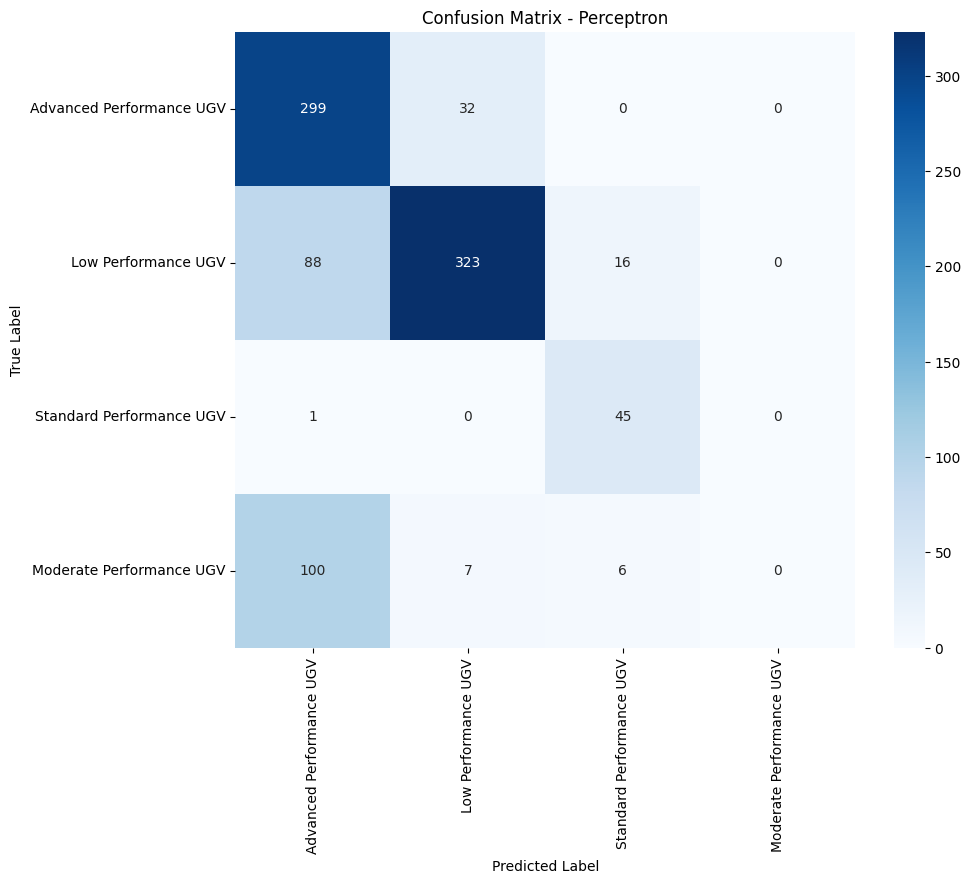


Classification Report:
                          precision    recall  f1-score   support

Advanced Performance UGV       0.61      0.90      0.73       331
     Low Performance UGV       0.89      0.76      0.82       427
Standard Performance UGV       0.67      0.98      0.80        46
Moderate Performance UGV       0.00      0.00      0.00       113

                accuracy                           0.73       917
               macro avg       0.54      0.66      0.59       917
            weighted avg       0.67      0.73      0.68       917


Individual Metrics:
Accuracy: 0.7274
Precision: 0.6703
Recall: 0.7274
F1 Score: 0.6848


In [54]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

# Perceptron
perceptron_classifier = Perceptron(random_state=42)
perceptron_classifier.fit(X_train, y_train)
perceptron_predictions = perceptron_classifier.predict(X_test)

print("Perceptron")
print("\nConfusion Matrix:")
perceptron_cm = confusion_matrix(y_test, perceptron_predictions)
plot_confusion_matrix(perceptron_cm, y_train.unique(), "Confusion Matrix - Perceptron")

print("\nClassification Report:")
print(classification_report(y_test, perceptron_predictions, target_names=y_train.unique()))

print("\nIndividual Metrics:")
print(f"Accuracy: {accuracy_score(y_test, perceptron_predictions):.4f}")
print(f"Precision: {precision_score(y_test, perceptron_predictions, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, perceptron_predictions, average='weighted'):.4f}")
print(f"F1 Score: {f1_score(y_test, perceptron_predictions, average='weighted'):.4f}")

Naive Bayes Classifier Maximum Likelihood Classification

Naive Bayes Classifier

Confusion Matrix:


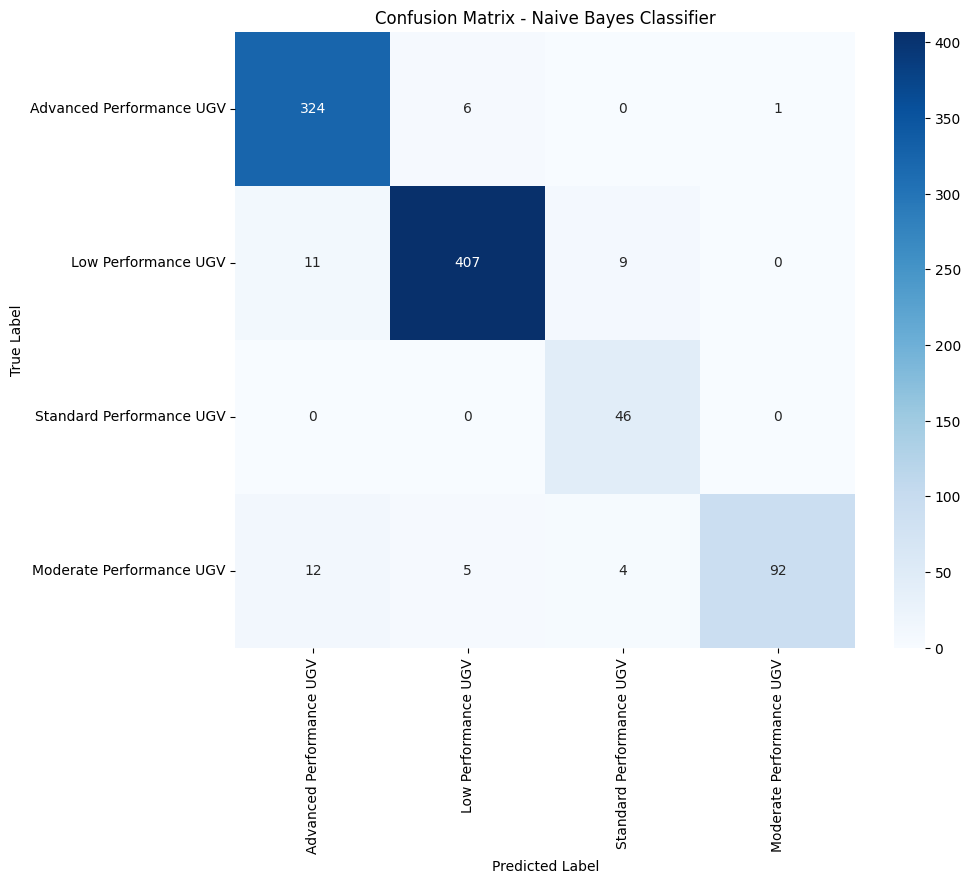


Classification Report:
                          precision    recall  f1-score   support

Advanced Performance UGV       0.93      0.98      0.96       331
     Low Performance UGV       0.97      0.95      0.96       427
Standard Performance UGV       0.78      1.00      0.88        46
Moderate Performance UGV       0.99      0.81      0.89       113

                accuracy                           0.95       917
               macro avg       0.92      0.94      0.92       917
            weighted avg       0.95      0.95      0.95       917


Individual Metrics:
Accuracy: 0.9477
Precision: 0.9514
Recall: 0.9477
F1 Score: 0.9476


In [55]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

# Naive Bayes Classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
nb_predictions = nb_classifier.predict(X_test)

print("Naive Bayes Classifier")
print("\nConfusion Matrix:")
nb_cm = confusion_matrix(y_test, nb_predictions)
plot_confusion_matrix(nb_cm, y_train.unique(), "Confusion Matrix - Naive Bayes Classifier")

print("\nClassification Report:")
print(classification_report(y_test, nb_predictions, target_names=y_train.unique()))

print("\nIndividual Metrics:")
print(f"Accuracy: {accuracy_score(y_test, nb_predictions):.4f}")
print(f"Precision: {precision_score(y_test, nb_predictions, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, nb_predictions, average='weighted'):.4f}")
print(f"F1 Score: {f1_score(y_test, nb_predictions, average='weighted'):.4f}")

Stochastic Gradient Descent (SGD) Classifier

Stochastic Gradient Descent Classifier

Confusion Matrix:


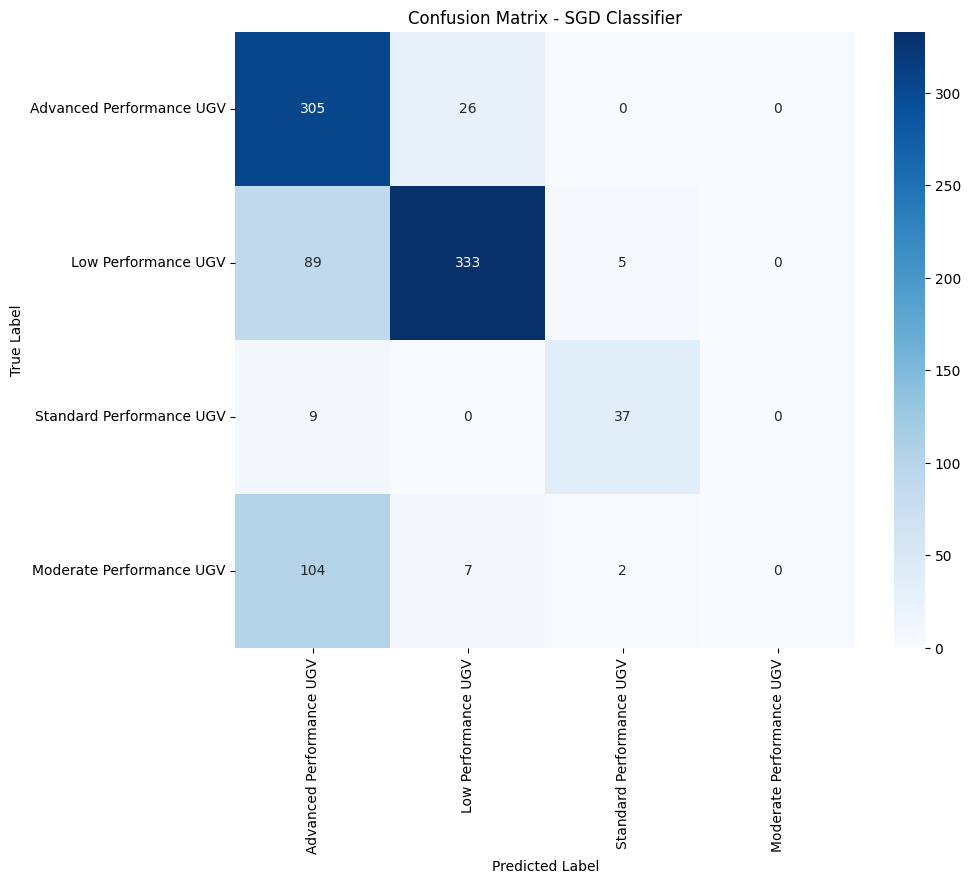


Classification Report:
                          precision    recall  f1-score   support

Advanced Performance UGV       0.60      0.92      0.73       331
     Low Performance UGV       0.91      0.78      0.84       427
Standard Performance UGV       0.84      0.80      0.82        46
Moderate Performance UGV       0.00      0.00      0.00       113

                accuracy                           0.74       917
               macro avg       0.59      0.63      0.60       917
            weighted avg       0.68      0.74      0.70       917


Individual Metrics:
Accuracy: 0.7361
Precision: 0.6830
Recall: 0.7361
F1 Score: 0.6951


In [57]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

# SGD Classifier
sgd_classifier = SGDClassifier(random_state=42)
sgd_classifier.fit(X_train, y_train)
sgd_predictions = sgd_classifier.predict(X_test)

print("Stochastic Gradient Descent Classifier")
print("\nConfusion Matrix:")
sgd_cm = confusion_matrix(y_test, sgd_predictions)
plot_confusion_matrix(sgd_cm, y_train.unique(), "Confusion Matrix - SGD Classifier")

print("\nClassification Report:")
print(classification_report(y_test, sgd_predictions, target_names=y_train.unique()))

print("\nIndividual Metrics:")
print(f"Accuracy: {accuracy_score(y_test, sgd_predictions):.4f}")
print(f"Precision: {precision_score(y_test, sgd_predictions, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, sgd_predictions, average='weighted'):.4f}")
print(f"F1 Score: {f1_score(y_test, sgd_predictions, average='weighted'):.4f}")